<h1>ML LABORATORY</h1>

<h3>Gradient Descent</h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import os
print(os.getcwd())



C:\Users\awezh


In [7]:
import pandas as pd
df = pd.read_csv(r"C:\\Users\awezh\AttendanceMarksSA.csv")

In [8]:
df = pd.read_csv('AttendanceMarksSA.csv')
df.head()

,Attendance,MSE,ESE
0,70,10,42
1,92,7,39
2,67,3,32
3,82,16,50
4,80,9,44


<Axes: xlabel='MSE', ylabel='ESE'>

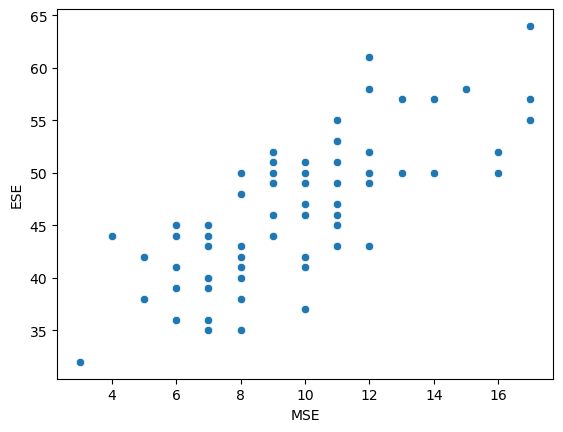

In [9]:
X= df['MSE']
Y=df['ESE']
sns.scatterplot(x=X, y=Y)

The parameters (i.e., beta0,beta1)
Hyper-parameters (e.g., alpha, count)
They initialised to zero to initiate the implementation of the gradient descent algorithm.

In [10]:
beta0=0
beta1=0
alpha=0.01
count =10000
n=float(len(X))

In [13]:
print(df.columns)


Index(['Attendance', 'MSE', 'ESE'], dtype='object')


In [14]:
alpha

0.01

In [15]:
for i in range(count): 
    Ybar = beta1*X + beta0    
    beta1 = beta1 - (alpha/n)*sum(X*(Ybar-Y))
    beta0 = beta0 - (alpha/n)*sum(Ybar-Y)
    
print(beta0,beta1)

30.66113097444092 1.6326392534114609


<h4>The following code segment plots the identified best fit line or regression line visually.</h4>

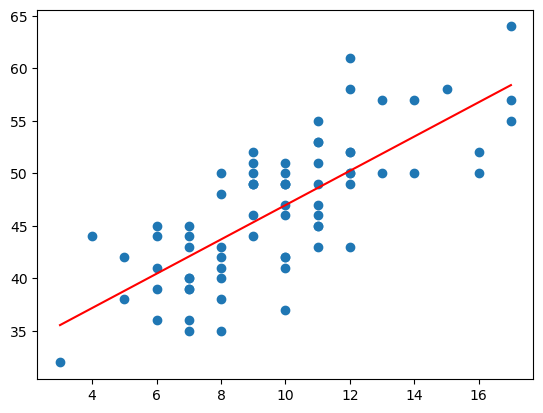

In [16]:
Ybar = beta1*X + beta0

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Ybar), max(Ybar)], color='red')  # regression line
plt.show()

In [17]:
import math
def RSE(y_true, y_predicted):
   
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = math.sqrt(RSS / (len(y_true) - 2))  
    return rse


rse= RSE(df['ESE'],Ybar)
print(rse)

4.3962248281750655


<h2>Using SciKit Learn Library</h2>

The second way to indirectly implement Gradient Descent is to use LinearRegression module from Scikit-Learn. It uses Object Oriented Approach to implement various ML algorithms.

In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

In [25]:
x = np.array(df['MSE']).reshape(-1,1)   # Convert 'MSE' column to numpy array and reshape into 2D(figure out how many rows and make them 1 column )
y = np.array(df['ESE']).reshape(-1,1)   # Convert 'ESE' column to numpy array and reshape into 2D

lr = LinearRegression()   # Linear Regression model object
lr.fit(x,y)               # Fit (train) the model on input x and output y

print(lr.coef_)           # Print slope (β1) of the regression line
print(lr.intercept_)      # Print intercept (β0) of the regression line

yp = lr.predict(x)        # Predict ESE values using the fitted model
rse = RSE(y,yp)           # Calculate Residual Standard Error between actual y and predicted yp

print(rse)                # Print RSE value to evaluate model accuracy


[[1.63215164]]
[30.66635246]
4.396224549647787




* The Linear Regression model was built using two methods:

  * Gradient Descent algorithm
  * Scikit-Learn’s `LinearRegression()` class

* Both methods give almost the same values for:

  * Slope (β₁)
  * Intercept (β₀)

* The model has a Residual Standard Error (RSE) ≈ **4.39**.

* This means the prediction of end-sem exam marks can vary by about **±4 marks** from the actual values based on mid-sem exam marks.


